# 결정트리(decision tree)
결정에 다다르기 위해 예/아니오의 질문을 이어나감

### 용어
 - 분기
 - 에지 : 질문의 답과 다음 질문을 연결
 - 노드 : 정답이 담긴 상자
     - 루트 노드 : 맨 위 노드로 전체 데이터셋이 담김
     - 리프 노드 : 맨 마지막 노드
     - 순수 노드 : 타깃 하나로만 이뤄진 리프 노드

### 결정 트리의 복잡도 제어하기
모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨
- 사전 가지치기 : 트리의 최대 깊이나 리프의 최대 개수를 제한, 노드가 분할하기 위한 포인트의 최소 개수를 지정
- 사후 가지치기 : scikit-learn 에서 지원하지 않음
  

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("trainset accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print('testset accuracy : {:.3f}'.format(tree.score(X_test, y_test)))


trainset accuracy : 1.000
testset accuracy : 0.937


In [18]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("trainset accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print('testset accuracy : {:.3f}'.format(tree.score(X_test, y_test)))

trainset accuracy : 0.988
testset accuracy : 0.951


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있음. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않음.

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성', '양성'],
                feature_names=cancer.feature_names, impurity=False, filled = True)

In [22]:
import Graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'Graphviz'

## Decision tree Ensemble


## Random Forest

결정트리의 주요 단점인 훈련 데이터에 과대적합되는 것을 회피할 수 있음

이는 각 트리는 비교적 예측을 잘 하지만 데이터의 일부에 과대작합하는 경향을 가진다는 데 기초한다. 예를 들어 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다는 것임.

#### RandomForest는 트리들이 달라지도록 트리 생성 시 무작위성을 주입함.
##### 1. 데이터포인트를 무작위로 선택하는 방법
##### 2. 분할 테스트에서 특성을 무작위로 선택하는 방법




### RandomForest 구축
1. 생성할 트리의 개수를 정함
2. 데이터의 부트스트랩 샘플을 생성(bootstrap sample) 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출
3. 위에서 만든 데이터셋으로 결정 트리를 만듦
    - 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾음
    - 몇 개의 특성을 고를지는 max_features 매개변수로 조정 가능
    
#### 핵심 매개변수는 max_features  이를 n_features로 하면 무작위성이 들어가지 않음. 즉, max_features 값을 크게 하면 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰지는 반면에 낮추면 각각 많이 달라지고 데이터에 맞추기 위해 깊이가 깊어짐

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import mglearn
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_tset = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

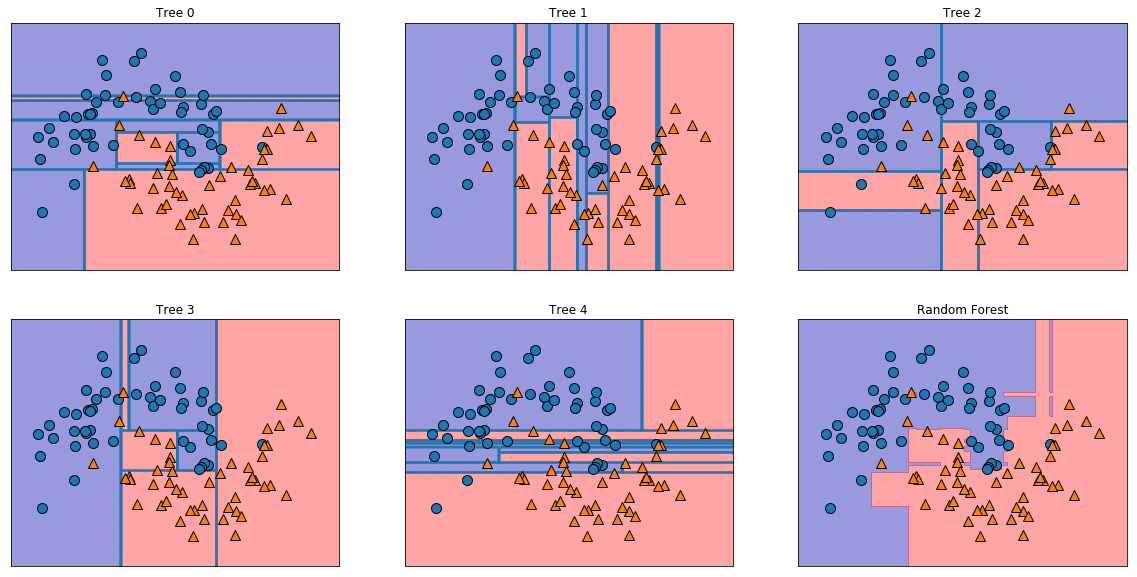

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도 : 0.972


Random Forest 역시 단일 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있음

또한 특성 중요도를 제공하는데 이는 각 트리의 특성 중요도를 취합하여 계산한 것임.

In [36]:
plot_feature_importances_cancer(forest)

NameError: name 'plot_feature_importances_cancer' is not defined

Random Forest에서는 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도를 갖는다. 

Random Forest를 만다는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 Random Forest가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있음

### 장단점과 매개변수
#### 장점
- 성능이 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음
- 멀티 코어 프로세서일 경우 n_jobs 매개변수를 이용하여 훈련속도를 빠르게 할 수 있다. n_jobs = n -> n개의 코어를 사용하고 기본값은 1이며, -1을 지정하면 모든 코어를 사용한다.

#### 단점
- 그러나 의사 결정 과정을 간소하게 표현해야 하거나 비전문가에게 예측 과정을 시각적으로 보여주기 위해서는 하나의 결정 트리가 더 좋은 선택이다
    - 수십, 수백 개의 트리를 분석하기 어렵고 단일 결정 트리보다 깊어지는 경향이 있기 때문
- 텍스트 데이터와 같이 차원이 높고 희소한 데이터에는 잘 작동하지 않음. 이는 선형 모델이 더 적합하며 선형모델보다 많은 메모리를 사용하며 훈련과 예측이 느린 단점이 있다.

#### 유의사항 
- random_state를 어떻게 지정하느냐에 따라 완전히 다른 모델이 만들어짐. 그러나 트리가 많을수록 이에 따른 변동이 적음

#### 중요 매개변수
- n_estimators : 클수록 좋음. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만듦. 주의사항은 이와 비례하여 메모리와 훈련시간이 늘어남
- max_features : 이 또한 과대적합을 줄여주며 일반적으로는 기본값을 사용
    - 분류 : max_features = sqrt(n_features)
    - 회귀 : max_features = n_features

### 그래디언트 부스팅 회귀 트리
이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성. 기본적으로 무작위성이 없으며 강력한 사전 가지치기가 사용됨.
깊지 않은 트리(약한 학습기; weak learner)를 여러 개 연결하는 방식으로 메모리를 적게 사용하고 예측도 빠름

중요 매개변수로는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate가 있음. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듦.

n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아짐

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test, y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


훈련 세트의 정확도가 100%이므로 과대적합된 것 같음.

이를 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음

In [38]:
# 트리의 최대 깊이 조절

gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [40]:
# 트리의 학습률 조절

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

그래디언트 부스팅은 일부 특성을 완전히 무시하고 있음

둘 다 잘 작동하지만 보통 더 안정적인 랜덤 포레스틀 먼저 적용하곤 함. 그러나 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그리디언트 부스팅을 사용

### 장단점과 매개변수
#### 장점 
- 특성의 스케일을 조정하지 않아도 되고 이진 특성이 연속적인 특성에서도 잘 작동함

#### 단점
- 매개변수 조절에 민감하다는 점과 훈련시간이 길다는 점
- 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음

#### 중요 매개변수
- n_estimators : 트리의 개수를 지정. 너무 클 경우 모델이 복잡해지고 과대적합될 가능성이 높아짐
- learning_rate : 이전 트리의 오차를 보정하는 정도 : 이를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 함.
- max_depth : 통상적으로 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 함